In [1]:
import nltk
from nltk import FreqDist
# nltk.download('stopwords') # run this one time

In [2]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

In [3]:
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# microwave文本主题聚类

In [4]:
data = pd.read_csv('micro_ok-.csv',encoding='ANSI')
data.head()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,size (cu.ft),type,finish,...,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,941,US,52989643,R3D7L40T8FAR3R,B00009V3X6,459626087,sharp 1.1-cubic-foot 850-watt over-the-range convection microwaves,1.1,over-the-range,NaN,...,Major Appliances,5,122,135,N,N,American Made Microwave w/convection -works great,"I purchased this item for two reasons, 1) because this is a Union Made microwave assembled in TN (the only American made microwave I've found) and 2) It has a convection oven that can double as a...",2004/6/19,0.4830
1,952,US,18471248,RVNWLGVDWE20J,B00009V3X8,379992322,sharp 1-1/2-cubic-foot 1000-watt over-the-range microwaves,1.5,over-the-range,NaN,...,Major Appliances,3,6,6,N,Y,Sharp could be Sharper,UPDATE: Yes i too had the door latch button melt and it does not function any longer it actually was replaced within the 1st year under warranty but now this has happened again a second time and i...,2004/6/21,0.9458
2,951,US,36386173,RXOAWGI9Z98QY,B00009V3WZ,379992322,sharp 1-1/2-cubic-foot 1000-watt over-the-range microwaves,1.5,over-the-range,NaN,...,Major Appliances,4,19,19,N,Y,"Great microwave, little tough to mount","Its a pretty big and heavy unit so having someone around to help mount would be a good thing. I found that sometimes the clips in the back have a little trouble popping in all the way, unless its...",2004/6/25,0.7968
3,997,US,40308862,RY9INWIK8MAL3,B00012ORT2,305608994,sharp 950-watt 1-2/5-cubic-foot over-the-range microwaves,1.4,over-the-range,NaN,...,Major Appliances,3,20,53,N,N,What Happened to Sharp Quality?,I do not have this particular microwave; though I do have a Sharp 1100 Carousel and feel compelled to comment. Originally I had another Sharp model. After about six mos. the door would not close...,2004/7/20,-0.7992
4,940,US,49010899,R2OXHMMI830KJ3,B00009V3X6,459626087,sharp 1.1-cubic-foot 850-watt over-the-range convection microwaves,1.1,over-the-range,NaN,...,Major Appliances,2,12,14,N,N,"A great, sleek oven... if you can get an undamaged one.",We ordered one of these and were shipped an open box/customer return. The bottom of the unit was dented and the interior was dented. It made a humming/vibrating noise during microwave operations. ...,2004/9/13,0.7827


In [5]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

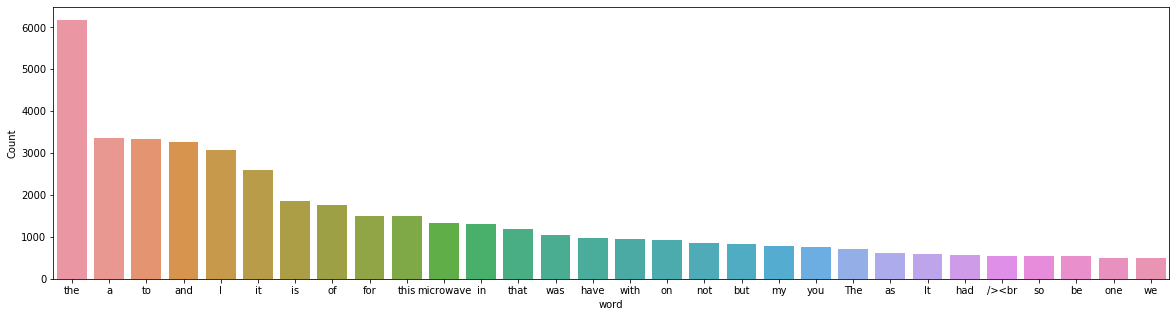

In [6]:
freq_words(data['review_body'])

In [7]:
data['review_body'] = data['review_body'].str.replace("[^a-zA-Z#]", " ")

In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [9]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
data['review_body'] = data['review_body'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in data['review_body']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

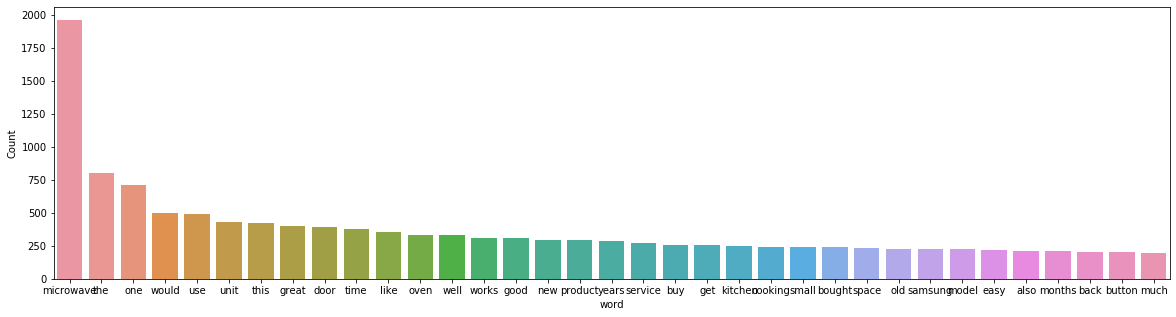

In [10]:
freq_words(reviews, 35)

In [11]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [12]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['update', 'yes', 'door', 'latch', 'button', 'melt', 'function', 'longer', 'actually', 'replaced', 'within', 'year', 'warranty', 'happened', 'second', 'time', 'boiling', 'water', 'front', 'burner', 'see', 'use', 'paying', 'second', 'repair', 'since', 'currently', 'using', 'pen', 'pop', 'door', 'open', 'course', 'replace', 'whole', 'microwave', 'near', 'future', 'soooo', 'happy', 'finally', 'wait', 'ditch', 'appliance', 'waste', 'next', 'time', 'choosing', 'regular', 'handle', 'push', 'button', 'latch', 'live', 'learn', 'test', 'designs', 'practical', 'applications', 'releasing', 'consumer', 'buying', 'anything', 'sharp', 'company', 'time', 'soon', 'purchased', 'microwave', 'replace', 'countertop', 'model', 'emerson', 'proffesional', 'stainless', 'steel', 'needed', 'spacesaving', 'feature', 'plus', 'vent', 'stove', 'wanted', 'stainless', 'steel', 'match', 'stainless', 'steel', 'appliances', 'purchased', 'amazon', 'lowest', 'price', 'could', 'find', 'currently', 'waiting', 'rebate', 'sha

In [13]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['update', 'door', 'latch', 'button', 'function', 'year', 'warranty', 'second', 'time', 'water', 'front', 'burner', 'use', 'second', 'repair', 'pen', 'pop', 'door', 'open', 'course', 'whole', 'microwave', 'happy', 'ditch', 'appliance', 'waste', 'next', 'time', 'regular', 'handle', 'push', 'button', 'latch', 'live', 'test', 'practical', 'application', 'consumer', 'buying', 'sharp', 'company', 'time', 'model', 'stainless', 'steel', 'feature', 'vent', 'stove', 'stainless', 'steel', 'match', 'stainless', 'steel', 'appliance', 'low', 'price', 'sharp', 'price', 'bad', 'deal', 'handle', 'sleek', 'control', 'panel', 'door', 'control', 'closing', 'door', 'easy', 'countertop', 'model', 'high', 'quality', 'stainless', 'steel', 'side', 'front', 'model', 'unit', 'vent', 'damper', 'bit', 'flimsy', 'sharp', 'reliability', 'exhaust', 'fan', 'unit', 'unit', 'bit', 'noisy', 'low', 'setting', 'wish', 'quieter', 'light', 'low', 'setting', 'bright', 'enough', 'night', 'light', 'overall', 'work', 'fine', 'g

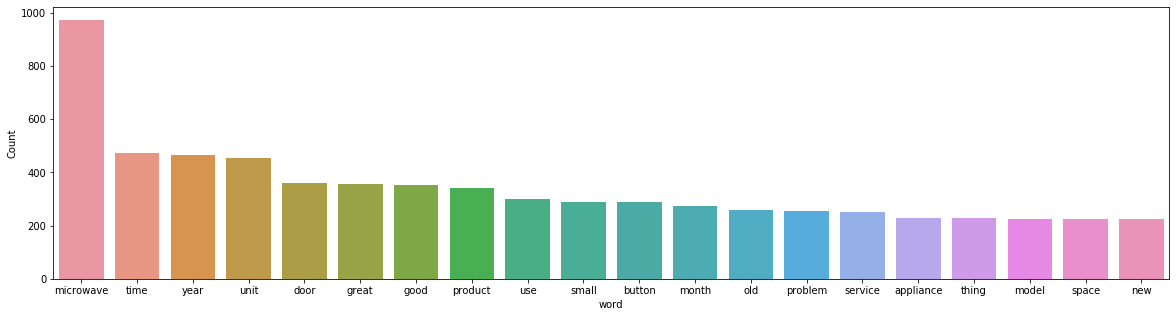

In [15]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

freq_words(reviews_3, 20)

In [16]:
dictionary = corpora.Dictionary(reviews_2)

In [17]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [18]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=100,
                chunksize=1000, passes=50)

In [19]:
lda_model.print_topics()

[(0,
  '0.034*"great" + 0.028*"good" + 0.023*"product" + 0.017*"price" + 0.014*"work" + 0.013*"old" + 0.013*"microwave" + 0.012*"easy" + 0.010*"cabinet" + 0.009*"hole"'),
 (1,
  '0.035*"microwave" + 0.018*"small" + 0.017*"time" + 0.014*"space" + 0.013*"use" + 0.012*"great" + 0.011*"size" + 0.011*"good" + 0.011*"button" + 0.011*"unit"'),
 (2,
  '0.031*"microwave" + 0.031*"year" + 0.023*"service" + 0.020*"month" + 0.017*"product" + 0.016*"part" + 0.015*"warranty" + 0.014*"problem" + 0.014*"new" + 0.013*"appliance"'),
 (3,
  '0.047*"door" + 0.028*"unit" + 0.019*"button" + 0.018*"year" + 0.016*"light" + 0.014*"open" + 0.014*"fan" + 0.013*"old" + 0.012*"time" + 0.010*"problem"')]

In [20]:
prob = lda_model.inference(doc_term_matrix)[0]
prob

array([[ 0.2612939 , 55.51742   ,  9.91414   ,  0.2664241 ],
       [ 0.26839256, 58.88163   , 21.734715  , 56.08327   ],
       [44.550564  , 27.294828  ,  0.26597416,  6.8596444 ],
       ...,
       [ 1.2413832 ,  0.2543618 ,  0.25000983,  0.2541752 ],
       [ 0.2564951 , 10.219393  ,  0.2517738 ,  0.2716599 ],
       [ 0.25481823,  2.2251346 ,  0.2520907 ,  0.26774636]],
      dtype=float32)

In [21]:
cluster = []
for i in range(len(prob)):
    m = list(prob[i])
    topic_cluster = m.index(max(m))
    cluster.append(topic_cluster)
data['cluster'] = cluster
data

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,size (cu.ft),type,finish,...,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment,cluster
0,941,US,52989643,R3D7L40T8FAR3R,B00009V3X6,459626087,sharp 1.1-cubic-foot 850-watt over-the-range convection microwaves,1.1,over-the-range,NaN,...,5,122,135,N,N,American Made Microwave w/convection -works great,purchased this item for two reasons because this Union Made microwave assembled the only American made microwave found and has convection oven that can double oven The styling this unit very nice ...,2004/6/19,0.4830,1
1,952,US,18471248,RVNWLGVDWE20J,B00009V3X8,379992322,sharp 1-1/2-cubic-foot 1000-watt over-the-range microwaves,1.5,over-the-range,NaN,...,3,6,6,N,Y,Sharp could be Sharper,UPDATE Yes too had the door latch button melt and does not function any longer actually was replaced within the year under warranty but now this has happened again second time and was only boiling...,2004/6/21,0.9458,1
2,951,US,36386173,RXOAWGI9Z98QY,B00009V3WZ,379992322,sharp 1-1/2-cubic-foot 1000-watt over-the-range microwaves,1.5,over-the-range,NaN,...,4,19,19,N,Y,"Great microwave, little tough to mount",Its pretty big and heavy unit having someone around help mount would good thing found that sometimes the clips the back have little trouble popping all the way unless its lined just right didnt li...,2004/6/25,0.7968,0
3,997,US,40308862,RY9INWIK8MAL3,B00012ORT2,305608994,sharp 950-watt 1-2/5-cubic-foot over-the-range microwaves,1.4,over-the-range,NaN,...,3,20,53,N,N,What Happened to Sharp Quality?,not have this particular microwave though have Sharp Carousel and feel compelled comment Originally had another Sharp model After about six mos the door would not close properly With little shovin...,2004/7/20,-0.7992,2
4,940,US,49010899,R2OXHMMI830KJ3,B00009V3X6,459626087,sharp 1.1-cubic-foot 850-watt over-the-range convection microwaves,1.1,over-the-range,NaN,...,2,12,14,N,N,"A great, sleek oven... if you can get an undamaged one.",ordered one these and were shipped open box customer return The bottom the unit was dented and the interior was dented made humming vibrating noise during microwave operations Amazon shipped anoth...,2004/9/13,0.7827,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,15,US,14964566,R3GCOEV4HYZG2I,B0055UBB4O,423421857,danby 0.7 cu.ft. countertop microwave,0.7,countertop,NaN,...,5,0,0,N,Y,Looks as good as the picture,Didn use long can attest that but for the price extremely good looking and feels like quality build Just know small you will not nuking turkeys this and not super high wattage may take bit longer ...,2015/8/31,0.5901,0
1481,16,US,13230389,R1V2OPPNL0QGCE,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,0.7,countertop,NaN,...,4,0,0,N,Y,Four Stars,Very nice microwave great price,2015/8/31,0.7845,0
1482,17,US,43655888,R9Q0QDTLKV567,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,0.7,countertop,NaN,...,3,0,1,N,Y,quiet,Quiet but does not seem like watt power,2015/8/31,-0.3950,0
1483,18,US,16018452,R3M88678ZYC6WI,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,0.7,countertop,NaN,...,5,0,0,N,Y,Great Microwave,Really love this microwave Has the one touch settings that wanted along with the seconds button Its great size for countertop can little noisy when beeps others have said,2015/8/31,0.9184,1


In [22]:
data.to_csv('microwave_ok.csv')

# hairdryer文本主题聚类

In [23]:
data = pd.read_csv('hair_ok-.csv',encoding='ANSI')
data.head()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,technology,power,color,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,11028,US,43740490,R2XM83JYE2KDE2,B00005O0MZ,694290590,conair corp pers care 146np conair ionic conditioning 1875-watt hair dryer,ionic,1875.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11027,US,38947355,R3JMGN42OJCL97,B00005O0MZ,694290590,conair corp pers care 146np conair ionic conditioning 1875-watt hair dryer,ionic,1875.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11026,US,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,conair corp pers care 146np conair ionic conditioning 1875-watt hair dryer,ionic,1875.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11025,US,43977044,R2JQPUYU65C4QD,B00005O0MZ,694290590,conair corp pers care 146np conair ionic conditioning 1875-watt hair dryer,ionic,1875.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11024,US,35599734,R2O50YNP83CG34,B000065DJY,919751065,revlon 1875w volumizing hair dryer,traditional,1875.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

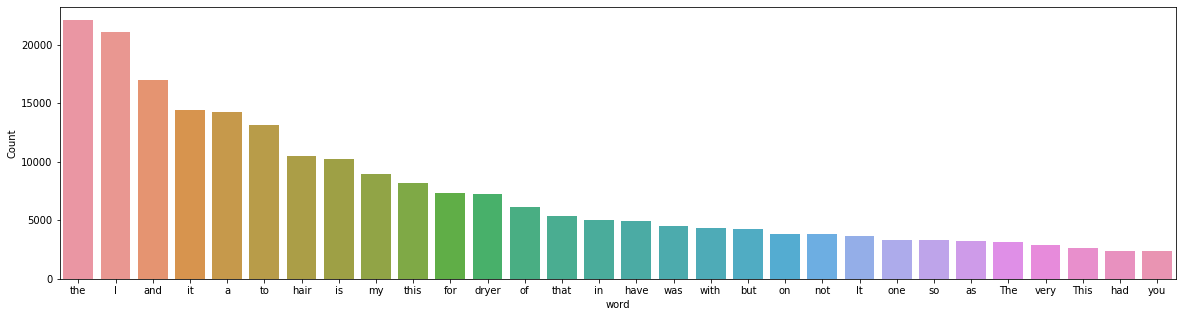

In [25]:
freq_words(data['review_body'])

In [26]:
data['review_body'] = data['review_body'].str.replace("[^a-zA-Z#]", " ")

In [27]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [28]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
data['review_body'] = data['review_body'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in data['review_body']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

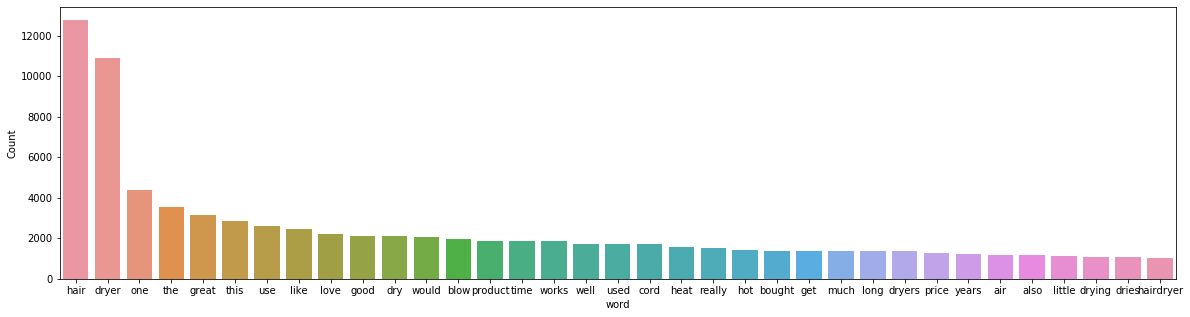

In [29]:
freq_words(reviews, 35)

In [30]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [31]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['this', 'hairdryer', 'far', 'exceeded', 'expection', 'volumizing', 'adding', 'shine', 'limp', 'fine', 'hair', 'tried', 'anything', 'volumizing', 'shampoo', 'hot', 'curlers', 'mega', 'hold', 'hair', 'spray', 'nothing', 'ever', 'satisfying', 'lasting', 'results', 'got', 'hair', 'dryer', 'blow', 'dry', 'normally', 'would', 'hair', 'looks', 'bouncy', 'shiny', 'right', 'away', 'and', 'stays', 'way', 'even', 'overnight', 'never', 'thought', 'possible', 'without', 'going', 'professional', 'salon', 'getting', 'hair', 'stretched', 'large', 'brushes', 'baked', 'blowdryer', 'minutes', 'and', 'nothing', 'better', 'stumbling', 'upon', 'inexpensive', 'product', 'wonders', 'highly', 'recommended', 'fine', 'hair']


In [32]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['hairdryer', 'expection', 'shine', 'limp', 'fine', 'hair', 'shampoo', 'hot', 'curler', 'hold', 'hair', 'spray', 'result', 'hair', 'dryer', 'hair', 'bouncy', 'shiny', 'way', 'possible', 'professional', 'salon', 'hair', 'large', 'brush', 'blowdryer', 'minute', 'inexpensive', 'product', 'wonder', 'fine', 'hair']


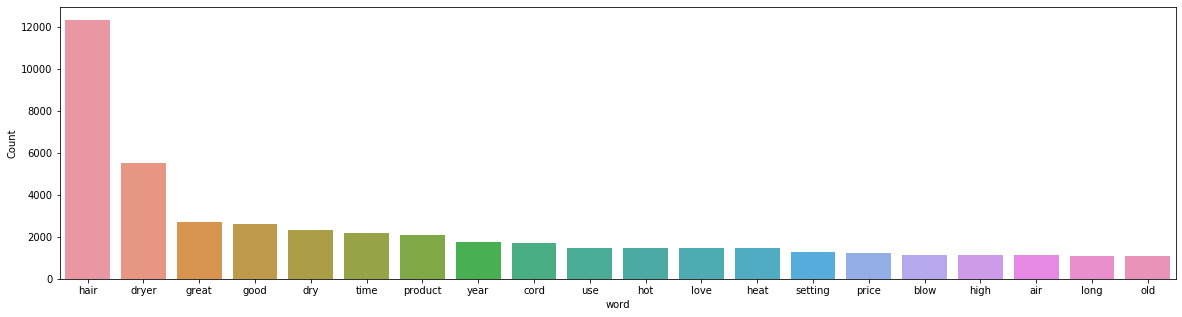

In [33]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

freq_words(reviews_3, 20)

In [34]:
dictionary = corpora.Dictionary(reviews_2)

In [35]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [36]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=100,
                chunksize=1000, passes=50)

In [37]:
lda_model.print_topics()

[(0,
  '0.070*"great" + 0.032*"small" + 0.031*"light" + 0.031*"hair" + 0.030*"dryer" + 0.030*"easy" + 0.020*"travel" + 0.019*"work" + 0.018*"powerful" + 0.016*"perfect"'),
 (1,
  '0.039*"heat" + 0.033*"setting" + 0.030*"hot" + 0.029*"high" + 0.028*"cord" + 0.023*"low" + 0.023*"air" + 0.022*"button" + 0.021*"cool" + 0.018*"good"'),
 (2,
  '0.178*"hair" + 0.054*"dryer" + 0.036*"dry" + 0.028*"time" + 0.023*"love" + 0.022*"good" + 0.017*"long" + 0.015*"great" + 0.015*"thick" + 0.013*"old"'),
 (3,
  '0.041*"product" + 0.037*"year" + 0.030*"month" + 0.021*"dryer" + 0.016*"use" + 0.016*"time" + 0.014*"good" + 0.013*"excellent" + 0.012*"day" + 0.012*"new"')]

In [38]:
prob = lda_model.inference(doc_term_matrix)[0]
prob

array([[ 0.25685883, 15.066896  , 35.396854  ,  0.26028657],
       [ 0.25597575,  0.28507698, 32.18608   ,  0.25663197],
       [ 0.27390566,  1.8986385 , 12.544384  ,  0.28166747],
       ...,
       [ 0.2558907 ,  8.24239   ,  0.25022358,  0.25122353],
       [ 1.248541  ,  0.25000066,  0.25144365,  0.25000066],
       [ 0.25      ,  0.25      ,  0.25      ,  0.25      ]],
      dtype=float32)

In [39]:
cluster = []
for i in range(len(prob)):
    m = list(prob[i])
    topic_cluster = m.index(max(m))
    cluster.append(topic_cluster)
data['cluster'] = cluster
data

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,technology,power,color,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,cluster
0,11028,US,43740490,R2XM83JYE2KDE2,B00005O0MZ,694290590,conair corp pers care 146np conair ionic conditioning 1875-watt hair dryer,ionic,1875.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,11027,US,38947355,R3JMGN42OJCL97,B00005O0MZ,694290590,conair corp pers care 146np conair ionic conditioning 1875-watt hair dryer,ionic,1875.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,11026,US,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,conair corp pers care 146np conair ionic conditioning 1875-watt hair dryer,ionic,1875.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,11025,US,43977044,R2JQPUYU65C4QD,B00005O0MZ,694290590,conair corp pers care 146np conair ionic conditioning 1875-watt hair dryer,ionic,1875.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,11024,US,35599734,R2O50YNP83CG34,B000065DJY,919751065,revlon 1875w volumizing hair dryer,traditional,1875.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11020,5,US,51995766,R230LCPQDOFJJZ,B000065DJY,919751065,revlon 1875w volumizing hair dryer,traditional,1875.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
11021,6,US,39431051,R21NN9ONVZITI0,B000FS1W4U,235105995,"revlon essentials 1875w fast dry hair dryer, rv408",traditional,1875.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
11022,7,US,180659,RYOOYLVIAHU2A,B003FBG88E,195677102,conair pro styler ionic conditioning hair dryer,ionic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11023,8,US,17023782,R18NK8BQ5LPMZZ,B0057HQ6C2,582752797,"pibbs ttec8012 twin turbo 3800 professional ionic and ceramic hair dryer, black, 2100 watt",ionic/ceramic,2100.0,black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [40]:
data.to_csv('hairdryer_ok.csv')

# Pacifier文本主题聚类

In [41]:
data = pd.read_csv('pacifier_ok-.csv',encoding='ANSI')
data.head()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,shape,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Sentiment,shape_notnull,Unnamed: 19
0,7396,us,36268736,r3cpdzrtytelqx,b00008x35t,855234646,dreamscapes soother,non,baby,5,1,1,n,n,bedtime ritual that works!,"i use the soother as part of our bedtime routine-- eat, bathe, rock for about ten minutes and read a story and/or sing a lullaby, into the crib with her pacifier, then turn on the soother... work...",2005/4/8,0.6671,0.0,NaN
1,7395,US,16222692,RPEBN4EJB6SB4,B000AKB4JG,735883323,lil' vampire baby pacifier (discontinued by manufacturer),non,Baby,2,6,6,N,N,funny but broken,"This was the funniest thing at Halloween,but it was also broken.It lasted one day before it dropped out of his mouth and a whole 20 inches to the ground and snapped a piece off.I would not buy again.",2007/1/11,0.7814,0.0,NaN
2,7394,US,49964974,R26IG5E768JTRL,B000M0CRXG,311600177,keep-it-kleen pacifier - silicone - betty butterfly - pink,non,Baby,1,1,2,N,N,Don't wast your money!,Did not like this item at all. The wings on the pacifer would not stay open so that the baby could use it. This item went in the trash!,2007/3/18,-0.4007,0.0,NaN
3,7393,US,31270166,R30088YE1N60HS,B000P23CU8,997127233,wubbanub infant pacifier - duck,duck,Baby,4,3,4,N,N,LOVE a duck!!,"I love this duck! My daughter is only 2 months old, she does not take a pacifier often, but when she does she has trouble keeping it in her mouth. This duck keeps the pacifier in/near her mouth so...",2007/5/24,0.9684,1.0,NaN
4,7392,US,13272588,R1F25DAK5269JS,B000BIZ87Q,226242876,"haba motley pacifier chain, multicolor",non,Baby,5,1,1,N,N,great buy!!!,i bought this for my 3month old and our pacifier problems are over!!! it works perfect and is much better looking than all the others.,2007/7/7,0.8798,0.0,NaN


In [42]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

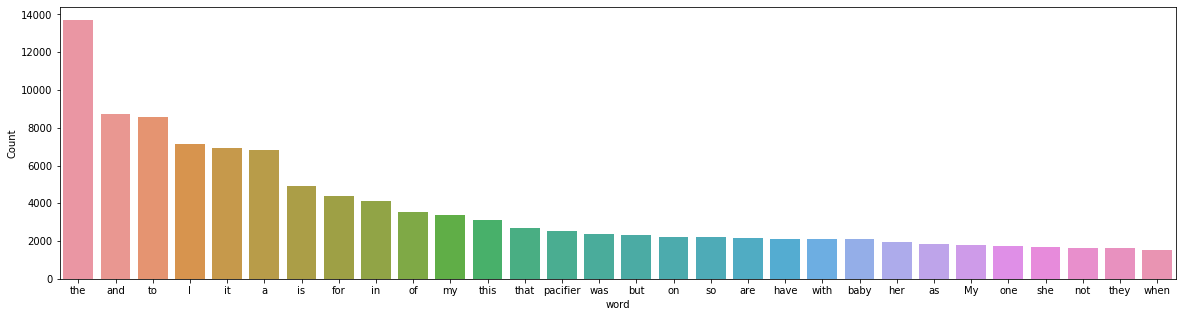

In [43]:
freq_words(data['review_body'])

In [44]:
data['review_body'] = data['review_body'].str.replace("[^a-zA-Z#]", " ")

In [45]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [46]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
data['review_body'] = data['review_body'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in data['review_body']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

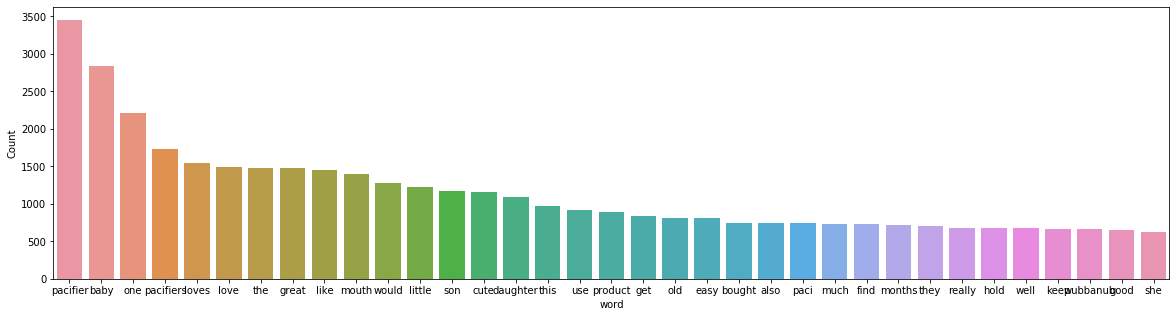

In [47]:
freq_words(reviews, 35)

In [48]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [49]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['this', 'funniest', 'thing', 'halloween', 'also', 'broken', 'lasted', 'one', 'day', 'dropped', 'mouth', 'whole', 'inches', 'ground', 'snapped', 'piece', 'would', 'buy']


In [50]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['funniest', 'thing', 'day', 'mouth', 'whole', 'inch', 'ground', 'piece']


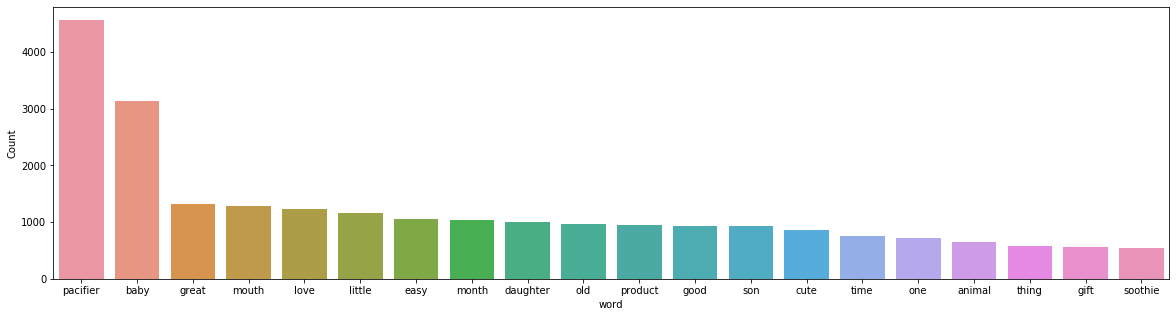

In [51]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

freq_words(reviews_3, 20)

In [52]:
dictionary = corpora.Dictionary(reviews_2)

In [53]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [54]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=100,
                chunksize=1000, passes=50)

In [55]:
lda_model.print_topics()

[(0,
  '0.034*"pacifier" + 0.033*"bag" + 0.023*"clean" + 0.019*"easy" + 0.017*"diaper" + 0.015*"baby" + 0.013*"great" + 0.012*"little" + 0.012*"product" + 0.011*"nice"'),
 (1,
  '0.062*"baby" + 0.051*"pacifier" + 0.030*"cute" + 0.030*"mouth" + 0.027*"easy" + 0.024*"little" + 0.023*"love" + 0.021*"animal" + 0.020*"old" + 0.019*"month"'),
 (2,
  '0.063*"pacifier" + 0.042*"good" + 0.039*"great" + 0.031*"product" + 0.030*"love" + 0.024*"daughter" + 0.020*"baby" + 0.019*"son" + 0.017*"quality" + 0.013*"time"'),
 (3,
  '0.067*"pacifier" + 0.042*"baby" + 0.026*"nipple" + 0.021*"color" + 0.020*"one" + 0.020*"mouth" + 0.017*"bottle" + 0.015*"month" + 0.013*"son" + 0.013*"shape"')]

In [56]:
prob = lda_model.inference(doc_term_matrix)[0]
prob

array([[ 1.7257998 ,  0.2704367 , 17.889437  ,  3.097958  ],
       [ 6.3453784 ,  2.129506  ,  0.25945586,  0.2586226 ],
       [ 4.0732274 ,  3.4025111 ,  0.26789385,  0.25414103],
       ...,
       [ 0.25639677,  2.2292264 ,  0.26352447,  0.2508272 ],
       [ 0.2500008 ,  1.2499902 ,  0.2500007 ,  0.25000066],
       [ 1.2049196 ,  0.263774  ,  0.26329198,  0.26794538]],
      dtype=float32)

In [57]:
cluster = []
for i in range(len(prob)):
    m = list(prob[i])
    topic_cluster = m.index(max(m))
    cluster.append(topic_cluster)
data['cluster'] = cluster
data

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,shape,product_category,star_rating,...,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Sentiment,shape_notnull,Unnamed: 19,cluster
0,7396,us,36268736,r3cpdzrtytelqx,b00008x35t,855234646,dreamscapes soother,non,baby,5,...,1,n,n,bedtime ritual that works!,use the soother part our bedtime routine eat bathe rock for about ten minutes and read story and sing lullaby into the crib with her pacifier then turn the soother works everytime baby now months ...,2005/4/8,0.6671,0.0000,NaN,2
1,7395,US,16222692,RPEBN4EJB6SB4,B000AKB4JG,735883323,lil' vampire baby pacifier (discontinued by manufacturer),non,Baby,2,...,6,N,N,funny but broken,This was the funniest thing Halloween but was also broken lasted one day before dropped out his mouth and whole inches the ground and snapped piece off would not buy again,2007/1/11,0.7814,0.0000,NaN,0
2,7394,US,49964974,R26IG5E768JTRL,B000M0CRXG,311600177,keep-it-kleen pacifier - silicone - betty butterfly - pink,non,Baby,1,...,2,N,N,Don't wast your money!,Did not like this item all The wings the pacifer would not stay open that the baby could use This item went the trash,2007/3/18,-0.4007,0.0000,NaN,0
3,7393,US,31270166,R30088YE1N60HS,B000P23CU8,997127233,wubbanub infant pacifier - duck,duck,Baby,4,...,4,N,N,LOVE a duck!!,love this duck daughter only months old she does not take pacifier often but when she does she has trouble keeping her mouth This duck keeps the pacifier near her mouth she can play with suck she ...,2007/5/24,0.9684,1.0000,NaN,1
4,7392,US,13272588,R1F25DAK5269JS,B000BIZ87Q,226242876,"haba motley pacifier chain, multicolor",non,Baby,5,...,1,N,N,great buy!!!,bought this for month old and our pacifier problems are over works perfect and much better looking than all the others,2007/7/7,0.8798,0.0000,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,5,US,44791277,R1QR2VQN2KLU6Z,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,giraffe,Baby,5,...,0,N,Y,"Kid loves it, so I do to.",Baby boy loves and like just hold the giraffe Happy kid happy parents,2015/8/31,0.9538,1.0000,NaN,1
7391,6,US,2943530,R3PRYHYQE0TLYK,B00B7U61QO,115431579,nuk pack of 4 trendline orthodontic pacifier bundle pack,non,Baby,5,...,0,N,Y,We love the NUK brand of bottles and pacifiers and these ...,love the NUK brand bottles and pacifiers and these pacifiers are exception These are the only brand kiddos would take With how easy these can lose this pack worth buying The colors are exactly pic...,2015/8/31,0.9798,0.0000,NaN,3
7392,7,US,114040,R2WGKHKDDYUBV8,B0028IDXDS,450475749,wubbanub brown monkey pacifier,monkey,Baby,5,...,0,N,Y,Five Stars,Perfect love,2015/8/31,0.6696,1.0000,NaN,1
7393,8,US,9603909,R3CSWENZZI15LL,B000AKB4IM,295960359,the original billy-bob teeth two front teeth pacifier,non,Baby,5,...,0,N,Y,Five Stars,Very Cute,2015/8/31,0.4588,0.0000,NaN,1


In [58]:
data.to_csv('pacifier_ok.csv')